<a href="https://colab.research.google.com/github/PManiAwasthi/IIITH-FMML-course-Assignments/blob/main/Lab2_MLPractice_FMML20210268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4219
Number of other samples =  16421
Percent of test data =  20.440891472868216 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
Answer)

In [ ]:
def findPoints(low, high, diff):
  accuracyNN = []
  accuracyRandom = []
  datasize = []
  for i in range(low, high, diff):
    datasize.append(100-i)
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)

    valPredNN = NN(traindata, trainlabel, valdata)
    valAccuracyNN = Accuracy(vallabel, valPredNN)
    accuracyNN.append(valAccuracyNN)

    valPredRandom = RandomClassifier(traindata, trainlabel, valdata)
    valAccuracyRandom = Accuracy(vallabel, valPredRandom)
    accuracyRandom.append(valAccuracyRandom)

  return accuracyNN, accuracyRandom, datasize

In [ ]:
#for different values of validation size lets see the accuracy
accuracyNN, accuracyRandom, valdatasize = findPoints(1,100, 5)

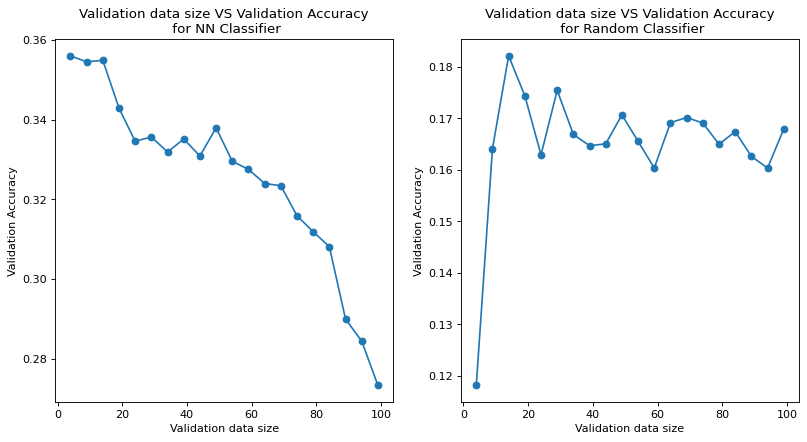

In [ ]:
plt.figure(figsize=(12,6),dpi = 80)
plt.subplot(1,2,1)
plt.scatter(valdatasize, accuracyNN)
plt.plot(valdatasize, accuracyNN)
plt.title("Validation data size VS Validation Accuracy\n for NN Classifier")
plt.xlabel("Validation data size")
plt.ylabel("Validation Accuracy")

plt.subplot(1,2,2)
plt.scatter(valdatasize, accuracyRandom)
plt.plot(valdatasize, accuracyRandom)
plt.title("Validation data size VS Validation Accuracy\n for Random Classifier")
plt.xlabel("Validation data size")
plt.ylabel("Validation Accuracy")

plt.show()

From the subplot 1 we can observe that the accuracy of the model decreases with the increase in size of validation data. Usually it is considered good to have a validation data set of size 10% to 25% so that we can validate that the model is not overfitted.
Conclusion - Increasing the size of validation data set reduces the accuracy, and there exists a value for validation set size for which the accuracy is high. if the validation accuracy is more or less than that value the accuracy comes out less.

for the subplot 2 we can observe that there is no impact of the size of validation dataset on accuracy as compared to NN classifier.

2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
Answer)

In [ ]:
def findPointsVal(low, high, diff):
  accuracyNN = []
  accuracyRandom = []
  datasize = []
  for i in range(low, high, diff):
    datasize.append(100-i)
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)

    valPredNN = NN(traindata, trainlabel, valdata)
    valAccuracyNN = Accuracy(vallabel, valPredNN)
    accuracyNN.append(valAccuracyNN)

    valPredRandom = RandomClassifier(traindata, trainlabel, valdata)
    valAccuracyRandom = Accuracy(vallabel, valPredRandom)
    accuracyRandom.append(valAccuracyRandom)

  return accuracyNN, accuracyRandom, datasize

def findPointsTest(low, high, diff):
  accuracyNN = []
  accuracyRandom = []
  datasize = []
  for i in range(low, high, diff):
    datasize.append(100-i)
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)

    testPredNN = NN(traindata, trainlabel, testdata)
    testAccuracyNN = Accuracy(testlabel, testPredNN)
    accuracyNN.append(testAccuracyNN)

    testPredRandom = RandomClassifier(traindata, trainlabel, testdata)
    testAccuracyRandom = Accuracy(testlabel, testPredRandom)
    accuracyRandom.append(testAccuracyRandom)

  return accuracyNN, accuracyRandom, datasize

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)

In [ ]:
#for different values of validation size lets see the accuracy
testaccuracyNN, testaccuracyRandom, valdatasize = findPointsTest(1,100, 5)
valaccuracyNN, valaccuracyRandom, valdatasize = findPointsTest(1,100,5)

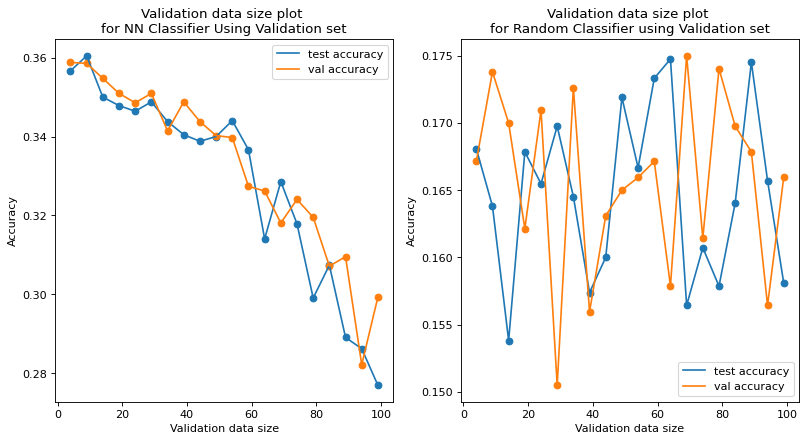

In [ ]:
plt.figure(figsize=(12,6),dpi = 80)
plt.subplot(1,2,1)
plt.scatter(valdatasize, testaccuracyNN)
plt.plot(valdatasize, testaccuracyNN, label="test accuracy")
plt.scatter(valdatasize, valaccuracyNN)
plt.plot(valdatasize, valaccuracyNN, label='val accuracy')
plt.legend()
plt.title("Validation data size plot \nfor NN Classifier Using Validation set")
plt.xlabel("Validation data size")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.scatter(valdatasize, testaccuracyRandom)
plt.plot(valdatasize, testaccuracyRandom,label="test accuracy")
plt.scatter(valdatasize, valaccuracyRandom)
plt.plot(valdatasize, valaccuracyRandom,label='val accuracy')
plt.title("Validation data size plot \nfor Random Classifier using Validation set")
plt.xlabel("Validation data size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

here there is no affect of validation set size on the test accuracy. Validation dataset here is just a way to check if the NN classifier is able to predict the values well or not.

What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?
Answer)
1. The size of the validation set according to the graphs obtained from the 
experiment would be 15% of the total training dataset we have. Usually also the values for the validation dataset are made from 10 to 25% of the training data as per the size of the total training data that we have for the experiment.

2. The model needs a fairly large dataset for it to be trained well and understand the data features, but it may lead to overfitting of the model so to reduce the chances of overfitting we need a validation set which in itself is small because larger values may lead to overfitting on even the validation dataset itself.

3. A very small values of validation dataset less than 10% may be insufficient to serve as a measure to check overfitting or to increase test accuracy.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3442644135489207
test accuracy is  0.35710747894997524


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


Does averaging the validation accuracy across multiple splits give more consistent results?
1. As we know that training the model using the dataset will always give newer results but slight difference in test and validation accuracy. To get a validation accuracy which is an average of certain number of times we trained the model will surely give us good and consistent results. Because the value will be obtained by many different values of accuracy over a number of iteration for which the model is being trained.

Does it give more accurate estimate of test accuracy?
1. if the average validation accuracy is good than we can say that the model will perform well on the test accuracy. Better the value of validation accuracy better will be the test accuracy. The test accuracy will be lower than validation accuracy but will not abrubtly give great variation in accuracy, until the test data has large variation in values than on which the model is trained.

What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [ ]:
def getAccuracyDetails(iterationVal):
  accValData = []
  accTestData = []
  iterations = []
  for i in range(10, iterationVal, 10):
    print('Predicting for Iteration ', i)
    avgValAccuracy = AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier = NN)
    testPred = NN(alltraindata, alltrainlabel, testdata)
    avgTestAccuracy = Accuracy(testlabel, testPred)
    iterations.append(i)
    accValData.append(avgValAccuracy)
    accTestData.append(avgTestAccuracy)
  return iterations, accValData, accTestData

In [ ]:
iterations, accValData, accTestData = getAccuracyDetails(51)

Predicting for Iteration  10
Predicting for Iteration  20
Predicting for Iteration  30
Predicting for Iteration  40
Predicting for Iteration  50


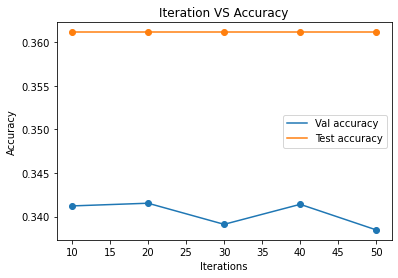

In [ ]:
plt.scatter(iterations, accValData)
plt.plot(iterations, accValData, label = "Val accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.scatter(iterations, accTestData)
plt.plot(iterations, accTestData, label = "Test accuracy")
plt.title("Iteration VS Accuracy")
plt.legend()

plt.show()

Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

The accuracy of the model increses with the increase in number of iterations. But with a very large number of iteration there are chances of overfitting so we need to find an optimal value of iterations on the basis of what model and dataset are we working on

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 70/100)
traindata, trainlabel, valdata, vallabel = split(traindata, trainlabel, 70/100)
traindata, trainlabel, valdata, vallabel = split(traindata, trainlabel, 70/100)

In [ ]:
traindata.shape

(5680, 8)

In [ ]:
valdata.shape

(2396, 8)

Now we have a small training dataset and validation set lets check if the values are still good for different iterations or not

In [ ]:
def getAccuracyDetails(iterationVal):
  accValData = []
  accTestData = []
  iterations = []
  for i in range(10, iterationVal, 10):
    print('Predicting for Iteration ', i)
    avgValAccuracy = AverageAccuracy(traindata, trainlabel, 75/100, i, classifier = NN)
    testPred = NN(traindata, trainlabel, testdata)
    avgTestAccuracy = Accuracy(testlabel, testPred)
    iterations.append(i)
    accValData.append(avgValAccuracy)
    accTestData.append(avgTestAccuracy)
  return iterations, accValData, accTestData

In [ ]:
iterations, accValData, accTestData = getAccuracyDetails(51)

Predicting for Iteration  10
Predicting for Iteration  20
Predicting for Iteration  30
Predicting for Iteration  40
Predicting for Iteration  50


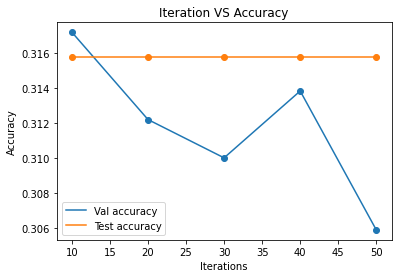

In [ ]:
plt.scatter(iterations, accValData)
plt.plot(iterations, accValData, label = "Val accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.scatter(iterations, accTestData)
plt.plot(iterations, accTestData, label = "Test accuracy")
plt.title("Iteration VS Accuracy")
plt.legend()

plt.show()

we can se that with less data the accuracy of the validation set is less as compared with the time when the dataset size was more.
Here in our case it doesn't effect much as we are using a classifier based on neighbor. But if we were to use a model for extracting the features and than use those features to predict and value, and save the now obtained weights than we might get lesser accuracy as we go on decreasing the data size, number of iteration helps the model to understand the data and find features or values to improve its accuracy so if we decrease the number of datasets and increase the iteration it will helps uptil a certain point and than will start decreasing as the model will start to overfit.
But its a good choice to increase the iterations if dataset is small